In [163]:
# imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load data
df_covid = pd.read_csv('data\covid19_states_humidityandcases.csv')

In [164]:
# look at basic info on the variables in our dataframe
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   USAState          51 non-null     object 
 1   TotalCases        51 non-null     object 
 2   NewCases          51 non-null     object 
 3   TotalDeaths       51 non-null     object 
 4   NewDeaths         51 non-null     float64
 5   ActiveCases       51 non-null     object 
 6   Average Humidity  51 non-null     object 
 7   Population        51 non-null     object 
dtypes: float64(1), object(7)
memory usage: 3.3+ KB


In [165]:
# Write function to clean data
def cleanNumeric(df, exclude):
    for col in df.columns:
        df[col] = df[col].astype(str)  # cast to string
        df[col] = df[col].str.replace(',', '').str.replace('%','').str.replace('+','')

        if col not in exclude:
            df[col] = df[col].astype(float)  # cast to float
            
    return df

df_covid = cleanNumeric(df_covid, ['USAState'])

In [166]:
# check variable set up
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   USAState          51 non-null     object 
 1   TotalCases        51 non-null     float64
 2   NewCases          51 non-null     float64
 3   TotalDeaths       51 non-null     float64
 4   NewDeaths         51 non-null     float64
 5   ActiveCases       51 non-null     float64
 6   Average Humidity  51 non-null     float64
 7   Population        51 non-null     float64
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


In [167]:
# check first few rows
df_covid.head()

,USAState,TotalCases,NewCases,TotalDeaths,NewDeaths,ActiveCases,Average Humidity,Population
0,new york,426807.0,0.0,32393.0,0.0,216906.0,75.6,19594330.0
1,california,319985.0,0.0,7030.0,4.0,227398.0,80.4,38066920.0
2,florida,269811.0,15300.0,4242.0,45.0,232919.0,77.0,19361792.0
3,texas,259465.0,0.0,3228.0,0.0,128357.0,77.0,26092033.0
4,new jersey,180672.0,0.0,15603.0,0.0,88899.0,71.3,8874374.0


In [168]:
df_covid['TotalCases%'] = df_covid['TotalCases']/df_covid['Population'] * 100
df_covid['TotalDeaths%'] = df_covid['TotalDeaths']/df_covid['Population'] * 100
df_covid['ActiveCases%'] = df_covid['ActiveCases']/df_covid['Population'] * 100

df_covid

,USAState,TotalCases,NewCases,TotalDeaths,NewDeaths,ActiveCases,Average Humidity,Population,TotalCases%,TotalDeaths%,ActiveCases%
0,new york,426807.0,0.0,32393.0,0.0,216906.0,75.6,19594330.0,2.2,0.2,1.1
1,california,319985.0,0.0,7030.0,4.0,227398.0,80.4,38066920.0,0.8,0.0,0.6
2,florida,269811.0,15300.0,4242.0,45.0,232919.0,77.0,19361792.0,1.4,0.0,1.2
3,texas,259465.0,0.0,3228.0,0.0,128357.0,77.0,26092033.0,1.0,0.0,0.5
4,new jersey,180672.0,0.0,15603.0,0.0,88899.0,71.3,8874374.0,2.0,0.2,1.0
5,illinois,154094.0,0.0,7369.0,0.0,31278.0,76.9,12868747.0,1.2,0.1,0.2
6,arizona,122467.0,2537.0,2237.0,86.0,105836.0,79.4,6561516.0,1.9,0.0,1.6
7,georgia,114401.0,0.0,2996.0,0.0,93715.0,75.8,9907756.0,1.2,0.0,0.9
8,massachusetts,111398.0,0.0,8310.0,0.0,8741.0,75.1,6657291.0,1.7,0.1,0.1
9,pennsylvania,99478.0,249.0,6958.0,5.0,19610.0,78.1,12758729.0,0.8,0.1,0.2


In [169]:
# check out summary statistics for our dataframe
df_covid.describe()

,TotalCases,NewCases,TotalDeaths,NewDeaths,ActiveCases,Average Humidity,Population,TotalCases%,TotalDeaths%,ActiveCases%
count,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.0
mean,64712.3,466.5,2648.5,3.2,33430.5,77.6,6158962.4,0.9,0.0,0.4
std,87206.0,2177.0,5138.9,13.5,56186.0,2.4,6981324.8,0.5,0.0,0.4
min,1200.0,0.0,17.0,0.0,174.0,71.3,575251.0,0.1,0.0,0.0
25%,12297.0,0.0,289.5,0.0,5106.5,75.8,1726672.5,0.6,0.0,0.1
50%,35419.0,0.0,951.0,0.0,11746.0,77.1,4383272.0,0.9,0.0,0.3
75%,74739.5,21.0,3018.5,0.0,26859.0,79.5,6778207.0,1.2,0.0,0.6
max,426807.0,15300.0,32393.0,86.0,232919.0,82.0,38066920.0,2.2,0.2,1.6


In [170]:
# How do our metrics compare for states in different humidity buckets? Check out medians

low_humid = df_covid[df_covid['Average Humidity'] <= 75.81].median()
medlow_humid = df_covid.loc[(df_covid['Average Humidity'] <= 77.14) & (df_covid['Average Humidity'] > 75.81) ].median()
medhigh_humid = df_covid.loc[(df_covid['Average Humidity'] <= 79.45) & (df_covid['Average Humidity'] > 77.14) ].median()
high_humid = df_covid[df_covid['Average Humidity'] >= 79.45].median()

# create a new data frame with the data gropued by market cap
humid = {'Low': low_humid,
        'Med-low': medlow_humid,
        'Med-high': medhigh_humid,
        'High': high_humid
        }

dfHumid = pd.DataFrame(humid)
pd.set_option('display.float_format', lambda x: '%.1f' % x)
dfHumid

,Low,Med-low,Med-high,High
TotalCases,73109.0,51079.0,27791.5,7454.0
NewCases,0.0,0.0,0.0,0.0
TotalDeaths,2996.0,1121.0,1046.5,114.0
NewDeaths,0.0,0.0,0.0,0.0
ActiveCases,24833.0,13177.0,15869.5,875.0
Average Humidity,74.8,76.9,78.3,80.5
Population,5887776.0,5724692.0,3237499.5,1328535.0
TotalCases%,1.2,0.9,0.9,0.6
TotalDeaths%,0.1,0.0,0.0,0.0
ActiveCases%,0.6,0.3,0.3,0.1


In [171]:
# How do our metrics compare for states in different humidity buckets? Check out means

low_humid = df_covid[df_covid['Average Humidity'] <= 75.81].mean()
medlow_humid = df_covid.loc[(df_covid['Average Humidity'] <= 77.14) & (df_covid['Average Humidity'] > 75.81) ].mean()
medhigh_humid = df_covid.loc[(df_covid['Average Humidity'] <= 79.45) & (df_covid['Average Humidity'] > 77.14) ].mean()
high_humid = df_covid[df_covid['Average Humidity'] >= 79.45].mean()

# create a new data frame with the data gropued by market cap
humid = {'Low': low_humid,
        'Med-low': medlow_humid,
        'Med-high': medhigh_humid,
        'High': high_humid
        }

dfHumid = pd.DataFrame(humid)
pd.set_option('display.float_format', lambda x: '%.1f' % x)
dfHumid

,Low,Med-low,Med-high,High
TotalCases,96421.7,81761.0,41840.8,37066.2
NewCases,49.4,1515.1,241.1,42.9
TotalDeaths,5846.8,1922.1,1828.0,934.1
NewDeaths,0.7,4.3,7.6,0.5
ActiveCases,46387.5,42783.3,21832.3,21826.5
Average Humidity,74.6,76.8,78.5,80.5
Population,6518650.6,8246037.8,4870074.4,4901941.7
TotalCases%,1.3,0.8,1.0,0.6
TotalDeaths%,0.1,0.0,0.0,0.0
ActiveCases%,0.6,0.4,0.6,0.2


The available variables to plot are: 
TotalCases
NewCases
TotalDeaths
NewDeaths
ActiveCases
Average Humidity
Population
TotalCases%
TotalDeaths%
ActiveCases%
What variable would you like for the x axis? Average Humidity
What variable would you like for the y axis? TotalCases%


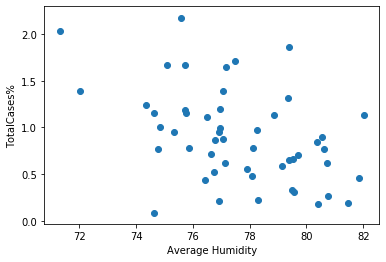

In [172]:
# Data Visualization

# Part one: user input

def getInput(prompt):
    userInput = input(prompt)
    error = "Sorry that variable is not available. Please try again."
    
    if userInput not in df_covid.columns:
        print(error)
        userInput = getInput(prompt)
        return userInput
        
    else:
        return userInput

# Print out variable list excluding labels
print("The available variables to plot are: ")
for v in df_covid.columns[1:]: print(v)

# Get user input for variables to plot
x = getInput("What variable would you like for the x axis? ")
y = getInput("What variable would you like for the y axis? ")

# Make scatterplot
plt.scatter(df_covid[x],df_covid[y])
plt.xlabel(x)
plt.ylabel(y)
plt.show()

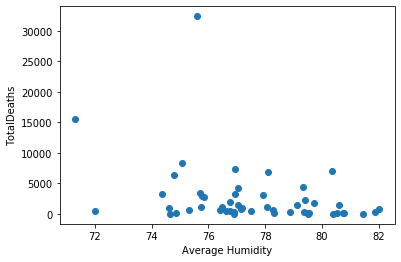

In [173]:
# Make scatterplot of total deaths vs humidity
plt.scatter(df_covid['Average Humidity'],df_covid['TotalDeaths'])
plt.xlabel('Average Humidity')
plt.ylabel('TotalDeaths')
plt.show()

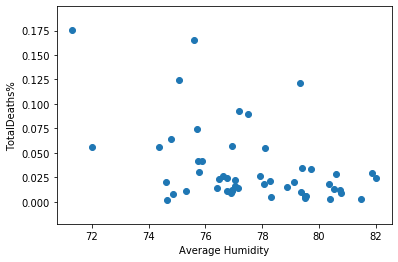

In [176]:
# Make scatterplot of total deaths vs humidity
plt.scatter(df_covid['Average Humidity'],df_covid['TotalDeaths%'])
plt.xlabel('Average Humidity')
plt.ylabel('TotalDeaths%')
plt.show()

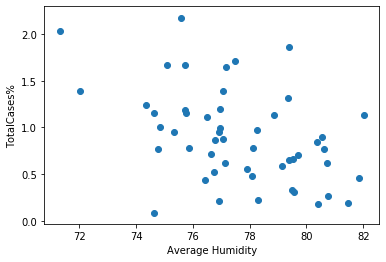

In [177]:
# Make scatterplot of total cases vs humidity
plt.scatter(df_covid['Average Humidity'],df_covid['TotalCases%'])
plt.xlabel('Average Humidity')
plt.ylabel('TotalCases%')
plt.show()

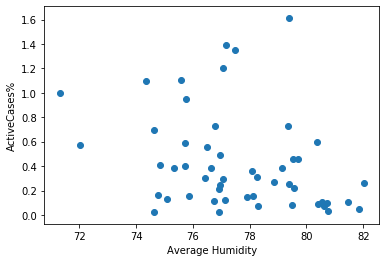

In [178]:
# Make scatterplot of total cases vs humidity
plt.scatter(df_covid['Average Humidity'],df_covid['ActiveCases%'])
plt.xlabel('Average Humidity')
plt.ylabel('ActiveCases%')
plt.show()